<a href="https://colab.research.google.com/github/kintanagasha/Pemrograman-Python/blob/main/TubesFIX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
# Import certain library to create a plot
import numpy as np 
import matplotlib.pyplot as plt

In [17]:
NtL = lambda n: 10*np.log10(n)

In [18]:
LtN = lambda x: 10**(x/10)

In [19]:
def pathloss(fq,types,ht,hr,d):

  # If frequency is define by the range number in MHz and then the result will assigned at Ca and Cb values
  if fq in range(150,1501):
    Ca=69.55
    Cb=26.16
  elif fq in range(1501,2001):
    Ca=46.3
    Cb=33.9
  else:
    Ca = print("The given frequency does not meet the C1 criteria.")
    Cb = print("The given frequency does not meet the C2 criteria.")
    return Ca,Cb
  
  # Based on the area type
  if types == 'urban' :
    cm=0
  elif types == 'suburban' :
    cm=-2*((np.log10((fq/28)**2))-5.4)
  elif types == 'open':
    cm=-4.78*(np.log10(fq))+18.33*(np.log10(fq))-40.94
  else:
    cm=print('The given area type(s) is not suitable for this parameter')
  
  # the value a(hr) is
  ahr = (1.1*np.log10(fq)-0.7)*hr-(1.56*np.log10(fq)-1.8)

  # Calculating the Path Loss Model
  Lp = Ca+(Cb*np.log10(fq))-(13.83*np.log10(ht))-ahr+((44.9-6.55*np.log10(ht))*np.log10(d))-cm
  return Lp

In [20]:
# The input Pathloss Model Cost 231 for Different Area and Frequency

# fq is the frequency in range of 150 to 2000 MHz
# ht is the height of antenna transmitter in range of 30 to 200 m
# hr is the height of antenna receiver in range of 1 to 20 m
# types is the type of area given
# d is the distance between the transmitter and receiver in m

fq1=700 #in Mhz
fq2=900 #in Mhz
fq3=1800 #in MHz
loc1='urban'
loc2='suburban'
loc3='open'
tower=80 #in m
user=1.5 #in m
dmin=300 #in m
dmax=1000 #in m
N=200 #dots
d=np.random.randint(dmin,dmax,N)

# Print the randon integer of Urban area distance input
print(d)


[465 734 548 583 365 416 988 870 939 962 734 439 523 425 995 507 532 689
 600 350 831 327 963 730 681 381 889 913 405 725 330 528 965 819 631 343
 316 689 780 586 554 509 715 979 345 688 809 567 516 433 582 922 309 666
 962 611 898 591 381 695 729 356 487 765 931 521 753 632 794 954 634 693
 671 518 877 536 321 842 320 980 946 531 689 489 615 376 400 716 567 812
 996 436 679 337 632 627 475 502 420 900 667 311 328 811 924 457 632 376
 405 763 658 977 862 581 578 920 706 818 805 307 333 642 667 673 974 556
 837 435 788 523 609 925 613 371 649 703 343 865 489 593 878 565 878 787
 664 330 403 580 421 832 542 427 473 981 900 773 549 977 675 488 745 331
 577 812 741 991 727 919 504 379 634 323 516 429 464 519 435 632 560 309
 510 881 858 527 445 427 513 542 645 477 667 447 939 424 678 813 440 912
 649 664]


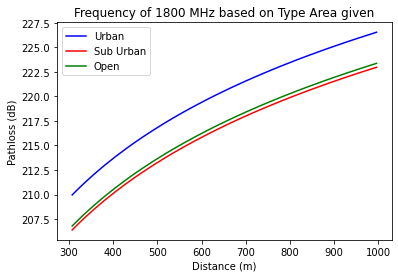

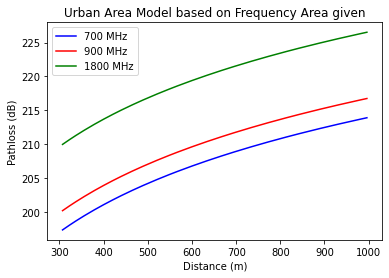

In [21]:
# Define the Pathloss Cost 231 Model for Area by the given input
LpUrban=pathloss(fq3,loc1,tower,user,d)
LpSubUrban=pathloss(fq3,loc2,tower,user,d)
LpOpen=pathloss(fq3,loc3,tower,user,d)

# Sort the Distance for Area 
d_sort=d[np.argsort(d)]
Urban_sort=LpUrban[np.argsort(d)]
Suburban_sort=LpSubUrban[np.argsort(d)]
Open_sort=LpOpen[np.argsort(d)]

fig, ax = plt.subplots()
ax.plot(d_sort,Urban_sort, color='b', label='Urban')
ax.plot(d_sort,Suburban_sort, color='r', label='Sub Urban')
ax.plot(d_sort,Open_sort, color='g', label='Open')
ax.set_title('Frequency of 1800 MHz based on Type Area given')
ax.set_xlabel('Distance (m)')
ax.set_ylabel('Pathloss (dB)')
ax.legend(loc='upper left')
plt.show()

# Define the Pathloss Cost 231 Model for Frequency by the given input
LpUrbanFQ1=pathloss(fq1,loc1,tower,user,d)
LpUrbanFQ2=pathloss(fq2,loc1,tower,user,d)
LpUrbanFQ3=pathloss(fq3,loc1,tower,user,d)

# Sort the Distance for Area 
d_sort=d[np.argsort(d)]
UrbanFQ_sort=LpUrbanFQ1[np.argsort(d)]
UrbanFQ2_sort=LpUrbanFQ2[np.argsort(d)]
UrbanFQ3_sort=LpUrbanFQ3[np.argsort(d)]

fig, ax = plt.subplots()
ax.plot(d_sort,UrbanFQ_sort, color='b', label='700 MHz')
ax.plot(d_sort,UrbanFQ2_sort, color='r', label='900 MHz')
ax.plot(d_sort,UrbanFQ3_sort, color='g', label='1800 MHz')
ax.set_title('Urban Area Model based on Frequency Area given')
ax.set_xlabel('Distance (m)')
ax.set_ylabel('Pathloss (dB)')
ax.legend(loc='upper left')
plt.show()

In [22]:
def ValuePrX(Ptx,Pl,Gtx,Grx):
  
  # Convert the Transmitter Power from mW to dBm
  PtdB=NtL(Ptx)
  
  # Calculating the Prx value
  PrX=PtdB - Pl + Gtx + Grx

  # Convert the Receiver Power from dBm to mW 
  PrXmW=LtN(PrX)

  return PrXmW

In [23]:
# The Input Receiver Power Model for Different Area and Frequency

# tx is the given transmitter power value
# pl is path loss value is derived from the prevoius calcultation model
# gtx is the given transmitter gain value
# grx is the given receiver gain value 

tx = 30000 # in miliwatt
Pla = Urban_sort
Plb = Suburban_sort
Plc = Open_sort
Pld = UrbanFQ_sort
Ple = UrbanFQ2_sort
Plf = UrbanFQ3_sort
gtx = 10 # in dB
grx = 2 # in dB

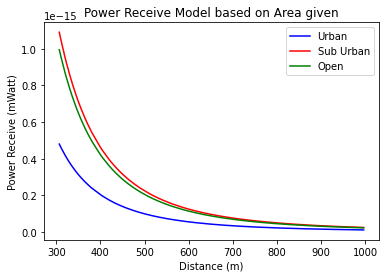

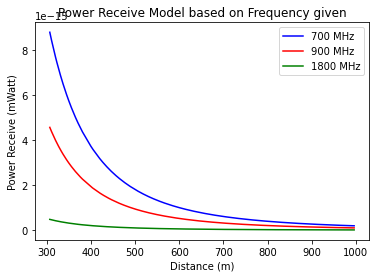

In [24]:
# Define the Receiver Power Model for Area by the given input
PrxUrban = ValuePrX(tx, Pla, gtx, grx)
PrxSubUrban = ValuePrX(tx, Plb, gtx, grx)
PrxOpen = ValuePrX(tx, Plc, gtx, grx)

# Define the Receiver Power Model for Frequency by the given input
PrxUrban700  = ValuePrX(tx, Pld, gtx, grx)
PrxUrban900  = ValuePrX(tx, Ple, gtx, grx)
PrxUrban1800 = ValuePrX(tx, Plf, gtx, grx)

fig, ax = plt.subplots()
ax.plot(d_sort,PrxUrban, color='b', label='Urban')
ax.plot(d_sort,PrxSubUrban, color='r', label='Sub Urban')
ax.plot(d_sort,PrxOpen, color='g', label='Open')
ax.set_title('Power Receive Model based on Area given')
ax.set_xlabel('Distance (m)')
ax.set_ylabel('Power Receive (mWatt)')
ax.legend(loc='upper right')
plt.show()

fig, ax = plt.subplots()
ax.plot(d_sort,PrxUrban700, color='b', label='700 MHz')
ax.plot(d_sort,PrxUrban900, color='r', label='900 MHz')
ax.plot(d_sort,PrxUrban1800, color='g', label='1800 MHz')
ax.set_title('Power Receive Model based on Frequency given')
ax.set_xlabel('Distance (m)')
ax.set_ylabel('Power Receive (mWatt)')
ax.legend(loc='upper right')
plt.show()

In [25]:
def SNRValue(Prx,BW):

  # Calculating the No to BW
  No=-174+10*np.log10(BW)

  # Converting the No in BW to Numeric
  NoW=LtN(No)

  # Calculating the SNR Value
  SNR= Prx/NoW

  return SNR

In [26]:
# The Input SNR Model for Different Area and Frequency

# prx is receiver power value derived from the previous calculation value
# bw is the given bandwith value

Prx1 = PrxUrban
Prx2 = PrxSubUrban
Prx3 = PrxOpen
Prx4 = PrxUrban700
Prx5 = PrxUrban900
Prx6 = PrxUrban1800
BW   = 50000000

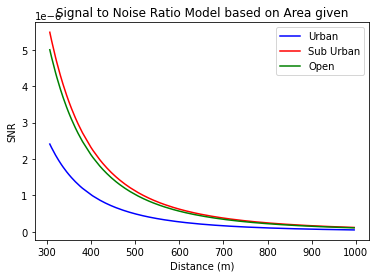

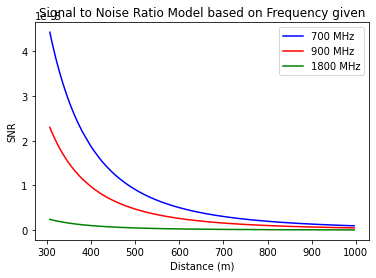

In [27]:
# Define the SNR Model for Area by the given input
SNRUrban = SNRValue(Prx1,BW)
SNRSubUrban = SNRValue(Prx2,BW)
SNROpen = SNRValue(Prx3,BW)

# Define the SNR Model for Frequency by the given input
SNRUrban700 = SNRValue(Prx4,BW)
SNRUrban900 = SNRValue(Prx5,BW)
SNRUrban1800 = SNRValue(Prx6,BW)

fig, ax = plt.subplots()
ax.plot(d_sort,SNRUrban, color='b', label='Urban')
ax.plot(d_sort,SNRSubUrban, color='r', label='Sub Urban')
ax.plot(d_sort,SNROpen, color='g', label='Open')
ax.set_title('Signal to Noise Ratio Model based on Area given')
ax.set_xlabel('Distance (m)')
ax.set_ylabel('SNR')
ax.legend(loc='upper right')
plt.show()

fig, ax = plt.subplots()
ax.plot(d_sort,SNRUrban700, color='b', label='700 MHz')
ax.plot(d_sort,SNRUrban900, color='r', label='900 MHz')
ax.plot(d_sort,SNRUrban1800, color='g', label='1800 MHz')
ax.set_title('Signal to Noise Ratio Model based on Frequency given')
ax.set_xlabel('Distance (m)')
ax.set_ylabel('SNR')
ax.legend(loc='upper right')
plt.show()

In [28]:
def Capacity(SNR,BW):

  # Calculating the Cell Capacity
  Celcap = BW*np.log2(1+SNR)

  return Celcap

In [29]:
# The Input Capacity Model for Different Area and Frequency

# SNR is a signal to noise ratio value derived from the previous calculation value
# BW is the given bandwith value

SNR1 = SNRUrban 
SNR2 = SNRSubUrban
SNR3 = SNROpen
SNR4 = SNRUrban700
SNR5 = SNRUrban900
SNR6 = SNRUrban1800
BW   = 50000000

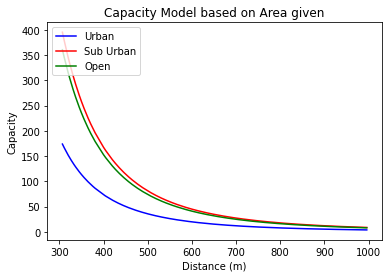

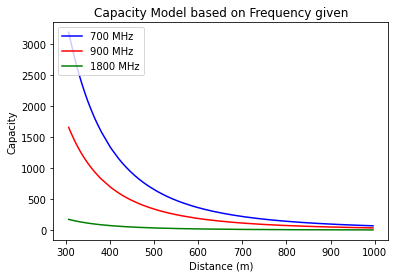

In [30]:
# Define the Cell Capacity Model for Area by the given input
celcapUrban = Capacity(SNR1, BW)
celcapSubUrban = Capacity(SNR2, BW)
celcapOpen = Capacity(SNR3, BW)

# Define the Cell Capacity Model for Frequency by the given input
celcapUrban700 = Capacity(SNR4, BW)
celcapUrban900 = Capacity(SNR5, BW)
celcapUrban1800 = Capacity(SNR6, BW)

fig, ax = plt.subplots()
ax.plot(d_sort,celcapUrban, color='b', label='Urban')
ax.plot(d_sort,celcapSubUrban, color='r', label='Sub Urban')
ax.plot(d_sort,celcapOpen, color='g', label='Open')
ax.set_title('Capacity Model based on Area given')
ax.set_xlabel('Distance (m)')
ax.set_ylabel('Capacity')
ax.legend(loc='upper left')
plt.show()

fig, ax = plt.subplots()
ax.plot(d_sort,celcapUrban700, color='b', label='700 MHz')
ax.plot(d_sort,celcapUrban900, color='r', label='900 MHz')
ax.plot(d_sort,celcapUrban1800, color='g', label='1800 MHz')
ax.set_title('Capacity Model based on Frequency given')
ax.set_xlabel('Distance (m)')
ax.set_ylabel('Capacity')
ax.legend(loc='upper left')
plt.show()